In [1]:
using Plots
using QuantumOptics
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Visual.jl")
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Qcrew.jl")
using .Qcrew

bc = Qcrew.bc
bq = Qcrew.bq

Spin(1/2)

In [2]:
a = [1,2,4]
using NPZ
npzwrite("C:/Users/jonat/Desktop/Code/multimode/multiMode/tests/a.npz", a=a)

SystemError: SystemError: opening file "C:/Users/jonat/Desktop/Code/multimode/multiMode/tests/a.npz": No such file or directory

### Plotting Wigner func

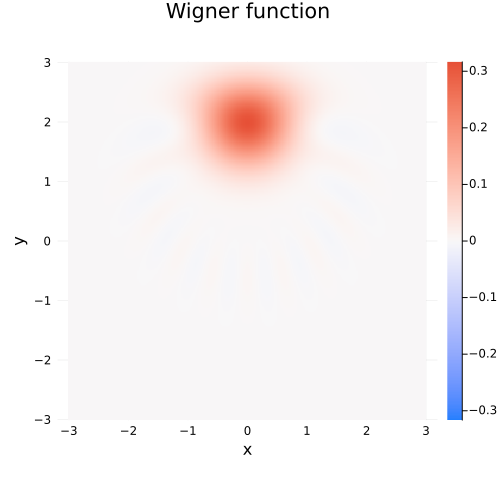

In [2]:

bc = Qcrew.bc
state = coherentstate(bc, 2)
#x = [-5:0.01:5;]
quick_plot_wigner(state)


## Testing Gates

In [5]:

state = ECD_operator(2.0, cb) * vac
cav_state = ptrace(state,1)

x = [-5:0.01:5;]
quick_plot_wigner(cav_state, x , x)



UndefVarError: UndefVarError: `qb` not defined

### Displacement Time Evolution

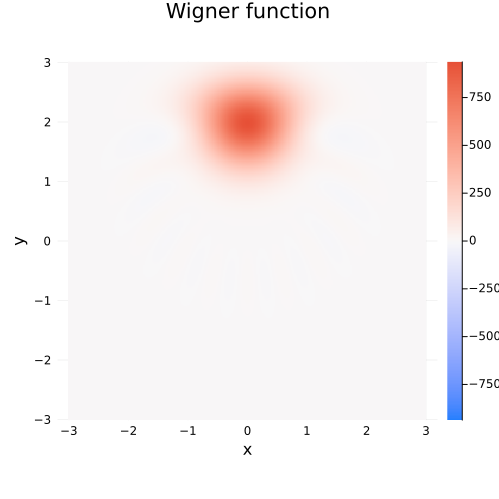

In [6]:
using QuantumOptics
function drive_ham(ϵ, a)
    ϵ * 1im*(a + dagger(a))
end

a = destroy(bc)
vac = fockstate(bc, 0)
function time_evolution(state, H, t)
    U = exp(-im * H * t)
    U * state
end

final = time_evolution(vac, drive_ham(1, a), 2)
quick_plot_wigner(final)


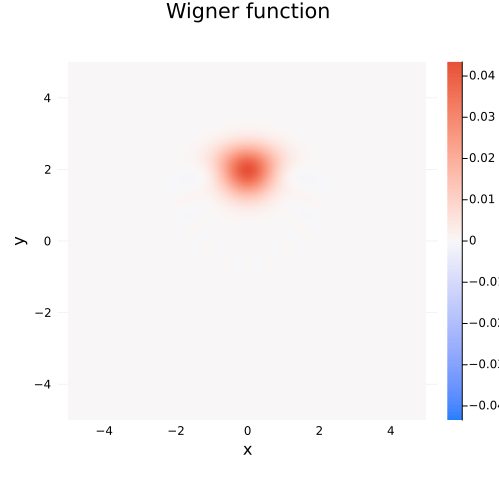

In [4]:
T = [0:0.01:1;]
t, psi = Qcrew.displacement_evolution(2,T, vac)
quick_plot_wigner(last(psi))


### Qubit drive
One full oscillation if time*epsilon = pi -> pi pulse needs product of pi/2

In [76]:
function H_qubit_drive(ϵ)
    # sign is chosen to match displace 
    # α = ϵ*T_max
    ϵ*Qcrew.sx/2
end

ground = spinup(bq)
T = [0:0.01:4;]
tout, ψt = timeevolution.schroedinger(T, vac, H_qubit_drive(pi));


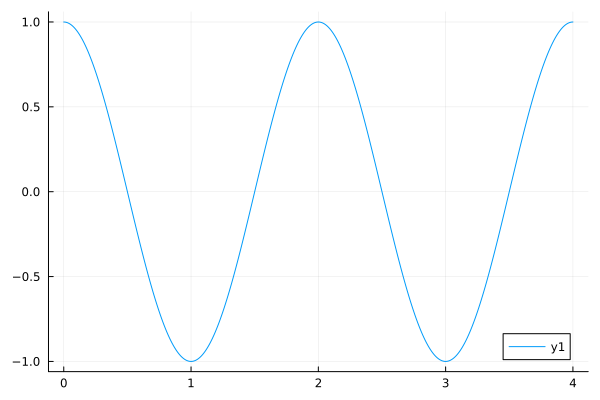

In [77]:
plot(tout, real.(expect(Qcrew.sz, normalize.(ψt))))

### ECD Time evolution

In [7]:
bc = Qcrew.bc
bq = Qcrew.bq

t_wait = [0:0.01:1;].*0.2e-6
t_pi = [0:0.1:40;].*1e-9
t_displace= [0:1:40;].*1e-9
ϵ = 4 * 1/maximum(t_displace) # scale according such that the prefactor gives actual displacement
δ = pi/maximum(t_pi) # scale according to a pi pulse

print("expected displacement: ", 2*ϵ*maximum(t_displace)*sin(Qcrew.χ*maximum(t_wait)), "\n")

psi0 = spindown(bq) ⊗ fockstate(bc,0)
psi_final = Qcrew.ECD_evolution(ϵ, δ, t_displace, t_wait, t_pi, psi0);
quick_plot_wigner(ptrace(normalize(psi_final[1]),1))

expected displacement: 7.608452130361228


MethodError: MethodError: no method matching schroedinger(::Float64, ::Vector{Float64}, ::Operator{CompositeBasis{Vector{Int64}, Tuple{SpinBasis{1//2, Int64}, FockBasis{Int64}}}, CompositeBasis{Vector{Int64}, Tuple{SpinBasis{1//2, Int64}, FockBasis{Int64}}}, SparseArrays.SparseMatrixCSC{ComplexF64, Int64}})

Closest candidates are:
  schroedinger(::Any, !Matched::T, ::AbstractOperator{B, B}; fout, kwargs...) where {B, Bo, T<:Union{AbstractOperator{B, Bo}, StateVector{B}}}
   @ QuantumOptics C:\Users\jonat\.julia\packages\QuantumOptics\6utec\src\schroedinger.jl:15


### Cavity Photon loss

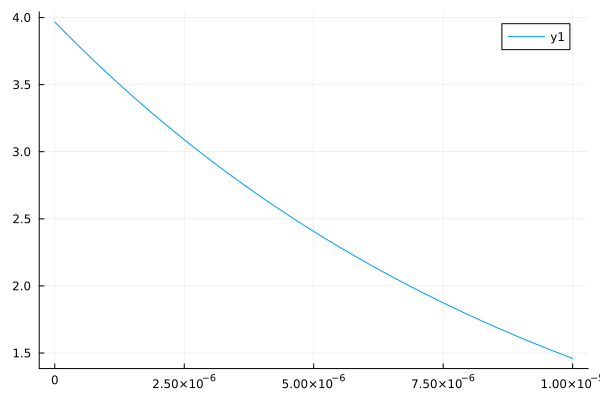

In [7]:
using QuantumOptics
basis = FockBasis(10)
a = destroy(basis)
at = create(basis)
fock = fockstate(basis, 10)
coherent = coherentstate(basis, 2)
rho = coherent ⊗ dagger(coherent)
H = identityoperator(basis)
t = [0:0.1:10;].*1e-6
J = [sqrt(1e5)*a]

t_list, rho_t = timeevolution.master(t, rho, H, J)


plot(t_list, real(expect(at*a, rho_t)))

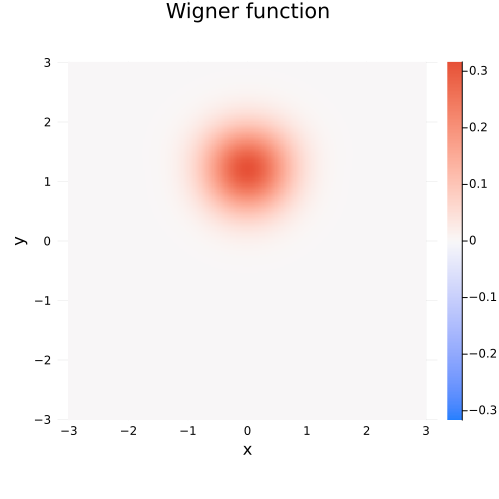

In [8]:
quick_plot_wigner(last(rho_t))

In [94]:
rho_t[1]

Operator(dim=11x11)
  basis: Fock(cutoff=10)
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  1.0+0.0im

51-element Vector{Float64}:
 0.0
 0.1
 0.2
 0.3
 0.4
 0.5
 0.6
 0.7
 0.8
 0.9
 ⋮
 4.2
 4.3
 4.4
 4.5
 4.6
 4.7
 4.8
 4.9
 5.0

In [64]:
tout, ρt_master = timeevolution.master(t_list, ρ₀, H)
# plot(t_list, real(expect(dagger(a)*a, ρt_master)))

MethodError: MethodError: no method matching master(::Vector{Float64}, ::Operator{FockBasis{Int64}, FockBasis{Int64}, Matrix{ComplexF64}}, ::FockBasis{Int64})

Closest candidates are:
  master(::Any, ::Operator, !Matched::AbstractOperator, !Matched::Any; rates, Jdagger, fout, kwargs...)
   @ QuantumOptics C:\Users\jonat\.julia\packages\QuantumOptics\6utec\src\master.jl:81
  master(::Any, ::Operator, !Matched::SuperOperator; fout, kwargs...)
   @ QuantumOptics C:\Users\jonat\.julia\packages\QuantumOptics\6utec\src\master.jl:119
  master(::Any, !Matched::Ket, ::Any...; kwargs...)
   @ QuantumOptics C:\Users\jonat\.julia\packages\QuantumOptics\6utec\src\master.jl:228


### Lossy ECD

expected displacement: 7.608452130361228

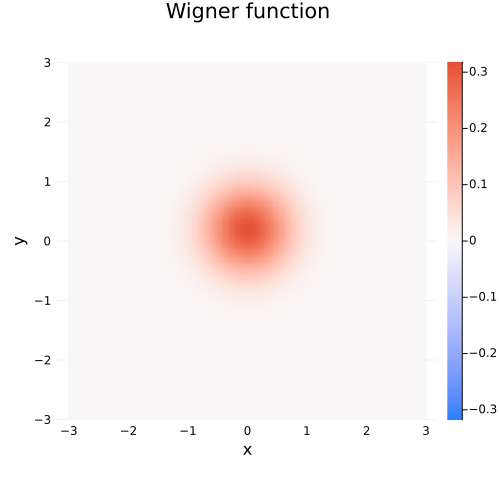

In [8]:
bc = Qcrew.bc
bq = Qcrew.bq

t_wait = [0:0.01:1;].*0.2e-6
t_pi = [0:0.1:40;].*1e-9
t_displace= [0:1:40;].*1e-9
ϵ = 4 * 1/maximum(t_displace) # scale according such that the prefactor gives actual displacement
δ = pi/maximum(t_pi) # scale according to a pi pulse

print("expected displacement: ", 2*ϵ*maximum(t_displace)*sin(Qcrew.χ*maximum(t_wait)), "\n")

psi0 = spindown(bq) ⊗ fockstate(bc,0)
ρ = psi0 ⊗ dagger(psi0)
a = Qcrew.Iq  ⊗ destroy(bc)
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(1e9, a)
J = [photon_loss_jump_op]
psi_final = Qcrew.ECD_evolution_loss(ϵ, t_displace, t_wait, t_pi, ρ, J);
quick_plot_wigner(ptrace(psi_final,1))




### Calibrating ECD 1

In [9]:
t_wait = [0:0.01:1;].*0.4e-6
t_pi = [0:0.1:40;].*1e-9
t_displace= [0:1:40;].*1e-9
ϵ = 4 * 1/maximum(t_displace) # scale according such that the prefactor gives actual displacement

1.0e8

In [11]:
ϵ_list = LinRange(0, 10, 20).*1/maximum(t_displace)

epsilon_1 = Qcrew.find_epsilon_1_for_ecd(ϵ_list, t_displace, t_wait, t_pi)

6.578947368421053e6

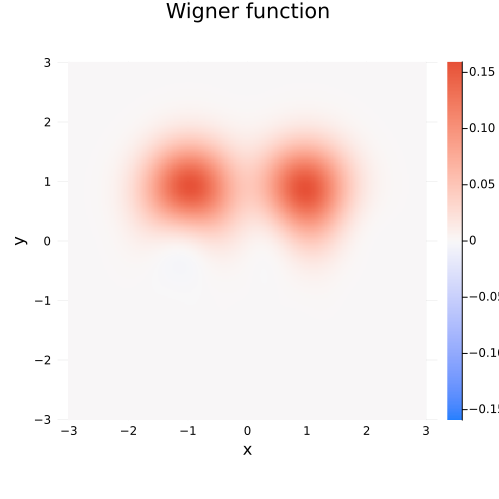

In [12]:
state = Qcrew.ECD_evolution(2*epsilon_1, t_displace, t_wait, t_pi, Qcrew.ge_vac)
quick_plot_wigner(ptrace(state,1))

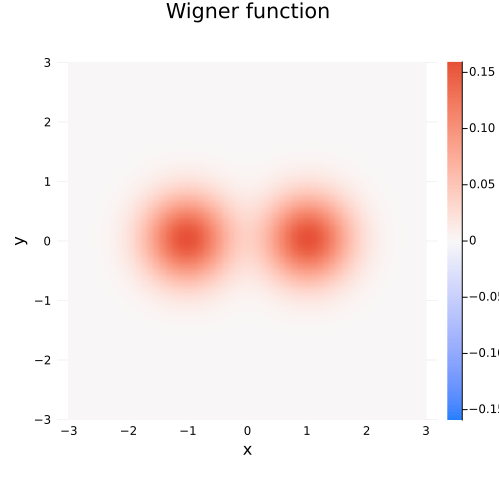

In [242]:
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(0, a)
J = [photon_loss_jump_op]

state = Qcrew.ECD_evolution_loss(2*epsilon_1, t_displace, t_wait, t_pi, Qcrew.Qcrew.ge_vac, J)
quick_plot_wigner(ptrace(state,1))

### U and V

In [248]:
bc = Qcrew.bc
bq = Qcrew.bq


#ϵ = 4 * 1/maximum(t_displace) # scale according such that the prefactor gives #actual displacement

psi0 = spindown(bq) ⊗ fockstate(bc,0)
ρ = psi0 ⊗ dagger(psi0)
a = Qcrew.Iq  ⊗ destroy(bc)
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(0, a)
J = [photon_loss_jump_op]


uvs = [1,-0.6]

rhos = Qcrew.UVs_evolution_loss(uvs, epsilon_1, t_displace, t_wait, t_pi2, ρ, J);
#quick_plot_wigner(ptrace(psi,1))

1.0-0.6

3-element Vector{Any}:
 Operator(dim=202x202)
  basis: [Spin(1/2) ⊗ Fock(cutoff=100)]
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                ⋮       
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0

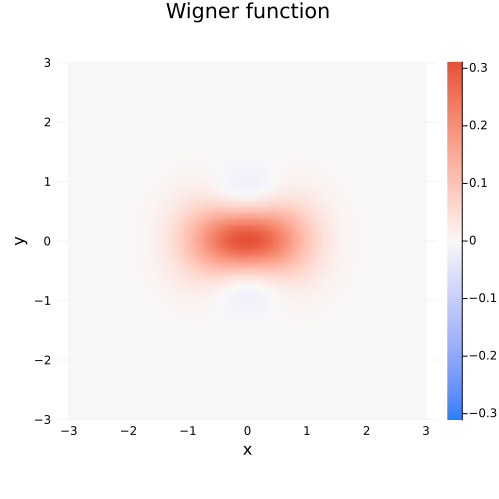

In [249]:
length(rhos)
quick_plot_wigner(ptrace(rhos[3],1))

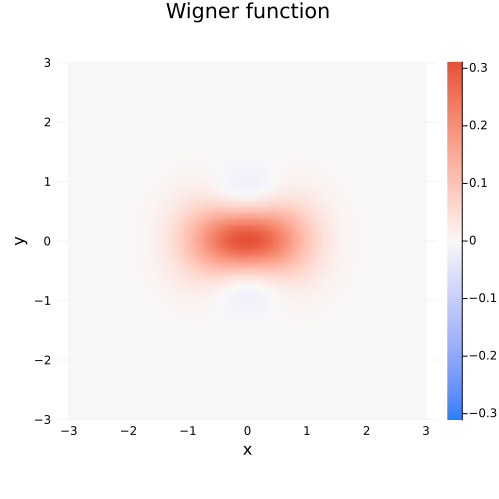

In [243]:
ρ1 = U_evolution_loss(1,epsilon_1, t_displace, t_wait, t_pi2, Qcrew.g_vac, J)
ρ2 = Qcrew.V_evolution_loss(-0.6,epsilon_1, t_displace, t_wait, t_pi2, ρ1, J);

# ρ3 = Qcrew.U_evolution_loss(1.3,epsilon_1, t_displace, t_wait, t_pi2, ρ2, J);
# ρ4 = Qcrew.V_evolution_loss(0.56,epsilon_1, t_displace, t_wait, t_pi2, ρ3, J);

# ρ5 = Qcrew.U_evolution_loss(-1.26,epsilon_1, t_displace, t_wait, t_pi2, ρ4, J);
# ρ6 = Qcrew.V_evolution_loss(-0.39,epsilon_1, t_displace, t_wait, t_pi2, ρ5, J);

quick_plot_wigner(normalize(ptrace(ρ2,1)))

In [4]:
bc = FockBasis(10)
state = fockstate(bc, 0)


Ket(dim=11)
  basis: Fock(cutoff=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

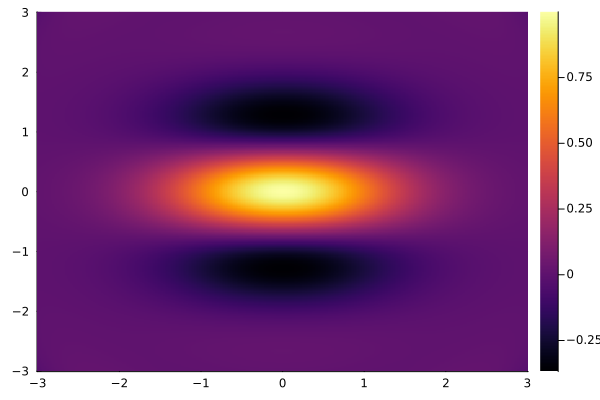

In [6]:
bc = FockBasis(10)
characteristic_function(bc,coherentstate(bc,1))

## Testing out 2 Mode thingys

In [13]:
### tired of scrolling up after editing Qcrew.jl
using Plots
using QuantumOptics
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Visual.jl")
include("C:/Users/jonat/Desktop/Code/multimode/multiMode/Qcrew.jl")
using .Qcrew

bc = Qcrew.bc
bq = Qcrew.bq

Spin(1/2)

In [14]:
### Step 1 calibrating ECD
t_wait = [0:0.01:1;].*0.4e-6
t_pi = [0:0.1:40;].*1e-9
t_displace= [0:1:40;].*1e-9
ϵ = 4 * 1/maximum(t_displace) # scale according such that the prefactor gives actual displacement

ϵ_list = LinRange(0, 10, 20).*1/maximum(t_displace)

epsilon_1 = Qcrew.find_epsilon_1_for_ecd(ϵ_list, t_displace, t_wait, t_pi)

6.578947368421053e6

In [3]:
# displacement amplitudes
ϵ = [2,2].*epsilon_1 
# loss zero for now
a = Qcrew.Iq  ⊗ destroy(bc) ⊗ destroy(bc)
photon_loss_jump_op = Qcrew.photon_loss_cavity_jump_operator(0, a)
J = [photon_loss_jump_op] 
# execute the gate
state = Qcrew.ECD_two_mode_evolution_loss(ϵ, t_displace, t_wait, t_pi, Qcrew.g_vac_vac, J, π/2)